## Featre Addition

### 1) 주변링크의 평균 통행

In [50]:
import pandas as pd


pd.options.display.float_format = '{: .2f}'.format

pub_station = pd.read_csv('../data/main_tables/PUB_STATION.csv')
link = pd.read_csv('../data/qgis/stationbuffer_x_links.csv', usecols=['sid', 'LINK_ID'])
trip = pd.read_csv('../data/qgis/taxi_trip.csv', encoding='cp949').rename(columns={' 평균통행량 ':'mean_trip', '링크아이디':'LINK_ID'})

In [51]:
display(pub_station.head())
display(link.head())
display(trip.head())

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00
3,애월119센터,제주_제주직할_애월119센터,제주특별자치도 제주시 애월읍 일주서로 6513,33.47,126.35,제주특별자치도_제주시,제주특별자치도_제주시_애월읍,2,0,50.00
4,수성구민운동장,대구_동대구_수성구민운동장,대구광역시 수성구 범어동 630-1,35.85,128.63,대구광역시_수성구,대구광역시_수성구_범어동,1,2,50.00


,sid,LINK_ID
0,강원_홍천_화양강휴게소,2570039102.00
1,강원_홍천_화양강휴게소,2570039202.00
2,강원_홍천_화양강휴게소,2570133000.00
3,강원_홍천_화양강휴게소,2570133100.00
4,강원_홍천_화양강휴게소,2570133300.00


,지역,LINK_ID,도로명,mean_trip
0,서울특별시 종로구,1000000301,종로,297.20
1,서울특별시 종로구,1000000302,종로,179.50
2,서울특별시 종로구,1000000303,종로,147.40
3,서울특별시 종로구,1000000401,종로,354.20
4,서울특별시 종로구,1000000402,종로,315.40


In [52]:
# 링크 데이터에 평균 통행 조인 이후, sid단위로 평균 집계
mean_trip = link.merge(trip[['LINK_ID', 'mean_trip']], how='left', on='LINK_ID').groupby(['sid']).mean_trip.mean()
mean_trip

sid
강원_강릉_HAPPY700 평창시네마      26.23
강원_강릉_감자연구소               63.23
강원_강릉_강남동주민센터            216.67
강원_강릉_강릉농협 하나로마트        1768.30
강원_강릉_강릉축협 하나로마트         901.94
                         ...   
충북_충주_중앙탑면 행정복지센터         54.12
충북_충주_충주시청 민원주차장         497.77
충북_충주_충주실내체육관            991.82
충북_충주_충주종합스포츠타운          126.17
충북_충주_평생학습관              419.35
Name: mean_trip, Length: 1304, dtype: float64

In [53]:
pub_station = pub_station.merge(mean_trip, on='sid')
pub_station.head()

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed,mean_trip
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00,16.25
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00,128.35
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00,31.89
3,애월119센터,제주_제주직할_애월119센터,제주특별자치도 제주시 애월읍 일주서로 6513,33.47,126.35,제주특별자치도_제주시,제주특별자치도_제주시_애월읍,2,0,50.00,101.35
4,수성구민운동장,대구_동대구_수성구민운동장,대구광역시 수성구 범어동 630-1,35.85,128.63,대구광역시_수성구,대구광역시_수성구_범어동,1,2,50.00,351.55


In [54]:
pub_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_name  1304 non-null   object 
 1   sid           1304 non-null   object 
 2   address       1304 non-null   object 
 3   lat           1304 non-null   float64
 4   long          1304 non-null   float64
 5   district_lv2  1304 non-null   object 
 6   district_lv3  1304 non-null   object 
 7   fast_cnt      1304 non-null   int64  
 8   slow_cnt      1304 non-null   int64  
 9   mean_speed    1293 non-null   float64
 10  mean_trip     1216 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 122.2+ KB


### 2) 도로종류별 길이

In [55]:
length = pd.read_csv('../data/qgis/stationbuffer_x_linklength.csv', usecols=['sid', 'length_highway', 'length_national', 'length_local', 'length_city'])

In [56]:
length.head()

,sid,length_highway,length_national,length_local,length_city
0,강원_홍천_화양강휴게소,0.00,2065.53,0.00,2590.38
1,서울_마포용산_상암월드컵경기장,499.55,4236.51,0.00,2929.40
2,제주_서귀포_대정읍사무소,0.00,0.00,1816.24,7394.46
3,제주_제주직할_애월119센터,0.00,0.00,1963.83,405.02
4,대구_동대구_수성구민운동장,0.00,0.00,0.00,5064.36


In [57]:
pub_station = pub_station.merge(length, how='left', on='sid')
pub_station.head()

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed,mean_trip,length_highway,length_national,length_local,length_city
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00,16.25,0.00,2065.53,0.00,2590.38
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00,128.35,499.55,4236.51,0.00,2929.40
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00,31.89,0.00,0.00,1816.24,7394.46
3,애월119센터,제주_제주직할_애월119센터,제주특별자치도 제주시 애월읍 일주서로 6513,33.47,126.35,제주특별자치도_제주시,제주특별자치도_제주시_애월읍,2,0,50.00,101.35,0.00,0.00,1963.83,405.02
4,수성구민운동장,대구_동대구_수성구민운동장,대구광역시 수성구 범어동 630-1,35.85,128.63,대구광역시_수성구,대구광역시_수성구_범어동,1,2,50.00,351.55,0.00,0.00,0.00,5064.36


In [58]:
pub_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     1304 non-null   object 
 1   sid              1304 non-null   object 
 2   address          1304 non-null   object 
 3   lat              1304 non-null   float64
 4   long             1304 non-null   float64
 5   district_lv2     1304 non-null   object 
 6   district_lv3     1304 non-null   object 
 7   fast_cnt         1304 non-null   int64  
 8   slow_cnt         1304 non-null   int64  
 9   mean_speed       1293 non-null   float64
 10  mean_trip        1216 non-null   float64
 11  length_highway   1304 non-null   float64
 12  length_national  1304 non-null   float64
 13  length_local     1304 non-null   float64
 14  length_city      1304 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 163.0+ KB


### 3) 반경 내 용도지역
- 용도지역 코드 전처리
    - 슬라이싱 및 인코딩 필요
- 용도지역 데이터가 '도시지역'에 제한되어있어 매핑된 sid도 도시지역만 남음

In [59]:
district = pd.read_csv('../data/qgis/stationbuffer_x_district.csv', usecols=['sid', 'A1', 'area'])
district.head()

,sid,A1,area
0,서울_마포용산_상암월드컵경기장,61100001144020140145UQA4300417003,80670.19
1,서울_마포용산_상암월드컵경기장,15000001144020039117UQA1230001001,1695.40
2,서울_마포용산_상암월드컵경기장,15000001144020020001UQA4300001001,159593.97
3,서울_마포용산_상암월드컵경기장,61100001144020130103UQA1220426011,35212.77
4,서울_마포용산_상암월드컵경기장,61100001144020130103UQA1300426012,193026.33


In [60]:
import numpy as np

district['dcode'] = district['A1'].map(lambda x: x[20:26] if x is not np.nan else x) \
                                  .map(lambda x: 'UQA500' if x ==  'UAQ500'  else x)

In [61]:
dgm = pd.read_csv('../data/dgm_code.csv', encoding='cp949')

In [62]:
dgm.head()

,UCODE,UNAME,DIV,LAW_NM,AR_GBN,LAW_CD,BYUL_YN,EXEC_DT,JO_NO,JO_SUB_NO,REC_SEQNO,PARENT_UCODE,DEL_DT,DEL_TXT,TERMS_NO,FRST_REGIST_DT,LAST_UPDT_DT
0,UNIM04,비행안전 제4구역,군사,군사기지 및 군사시설 보호법,NaN,10375.00,0.00,20080922.00,400.00,0.00,530.00,UNE400,NaN,NaN,NaN,20220908,20220908
1,UHK100,일반물류단지,공업,물류시설의 개발 및 운영에 관한 법률 제22조,NaN,10387.00,0.00,20080906.00,2200.00,0.00,1020.00,000000,NaN,NaN,205.00,20220908,20220908
2,UMK400,(한강)건축 등 허가제한지역,환경,한강수계 상수원수질개선 및 주민지원 등에 관한 법률,NaN,9136.00,0.00,20140131.00,500.00,0.00,2132.00,000000,NaN,NaN,NaN,20220908,20220908
3,UNE114,통제보호구역(해군기지),국방,군사기지 및 군사시설 보호법,NaN,10375.00,0.00,20090910.00,400.00,0.00,NaN,UNE110,NaN,NaN,NaN,20220908,20220908
4,UQS700,항만,국토종합,국토의 계획 및 이용에 관한 법률 시행령,NaN,9419.00,0.00,20170101.00,8300.00,1000000000.00,NaN,NaN,NaN,NaN,NaN,20220908,20220908


In [63]:
# 참고: https://alpmint.tistory.com/1922
# 코드 변환 데이터에 존재하지 않는 코드는 검색으로 찾아 수동으로 부여
dcode_table = pd.DataFrame(district.dcode.unique(), columns=['dcode'])
dcode_table = dcode_table.merge(dgm[['UCODE', 'UNAME']], how='left', left_on='dcode', right_on='UCODE').drop(columns=['UCODE'])
dcode_table = dcode_table.sort_values('dcode').rename(columns={'UNAME':'dname'})
dcode_table['counts'] = district.drop_duplicates(['sid', 'dcode']).dcode.value_counts().sort_index().values
dcode_table.loc[dcode_table.dcode == 'UQA500', 'dname'] = '도시지역미지정'
dcode_table.loc[dcode_table.dcode == 'UQA999', 'dname'] = '도시지역기타'
dcode_table.loc[dcode_table.dcode == 'UQA01X', 'dname'] = 'error'
dcode_table

,dcode,dname,counts
12,UQA01X,error,258
21,UQA100,주거지역,2
8,UQA111,제1종전용주거지역,46
17,UQA112,제2종전용주거지역,25
11,UQA120,일반주거지역,9
4,UQA121,제1종일반주거지역,684
2,UQA122,제2종일반주거지역,889
1,UQA123,제3종일반주거지역,514
3,UQA130,준주거지역,564
20,UQA200,상업지역,2


In [64]:
# 세부 분류를 그룹화
def decode_grouper(name):
    if '주거' in name:
        return '주거지역'
    if '상업' in name:
        return '상업지역'
    if '녹지' in name:
        return '녹지지역'
    if '공업' in name:
        return '공업지역'
    return '기타'

In [65]:
dcode_table.dname = dcode_table.dname.map(decode_grouper)
dcode_table

,dcode,dname,counts
12,UQA01X,기타,258
21,UQA100,주거지역,2
8,UQA111,주거지역,46
17,UQA112,주거지역,25
11,UQA120,주거지역,9
4,UQA121,주거지역,684
2,UQA122,주거지역,889
1,UQA123,주거지역,514
3,UQA130,주거지역,564
20,UQA200,상업지역,2


In [66]:
district = district.merge(dcode_table[['dcode', 'dname']], how='left', on='dcode').drop(columns=['A1', 'dcode'])

In [67]:
district.head()

,sid,area,dname
0,서울_마포용산_상암월드컵경기장,80670.19,녹지지역
1,서울_마포용산_상암월드컵경기장,1695.40,주거지역
2,서울_마포용산_상암월드컵경기장,159593.97,녹지지역
3,서울_마포용산_상암월드컵경기장,35212.77,주거지역
4,서울_마포용산_상암월드컵경기장,193026.33,주거지역


<AxesSubplot: ylabel='Frequency'>

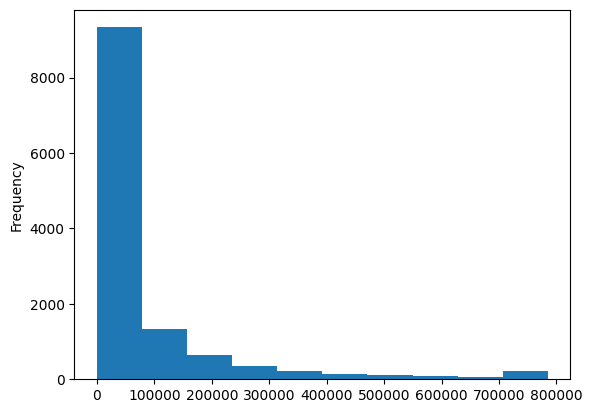

In [68]:
district.area.plot(kind='hist')

In [69]:
district = district.groupby(['sid', 'dname']).area.sum().to_frame().reset_index()

In [70]:
district.head()

,sid,dname,area
0,강원_강릉_강남동주민센터,녹지지역,423671.88
1,강원_강릉_강남동주민센터,주거지역,360979.87
2,강원_강릉_강릉농협 하나로마트,녹지지역,205504.87
3,강원_강릉_강릉농협 하나로마트,상업지역,255227.75
4,강원_강릉_강릉농협 하나로마트,주거지역,323921.02


In [71]:
# 각 용도지역 너비의 합을 1로 처리

def normalize_area(sid_df):
        sid_df.area = sid_df.area / sid_df.area.sum()
        return sid_df

district = district.groupby('sid', group_keys=False).apply(normalize_area)        

<AxesSubplot: ylabel='Frequency'>

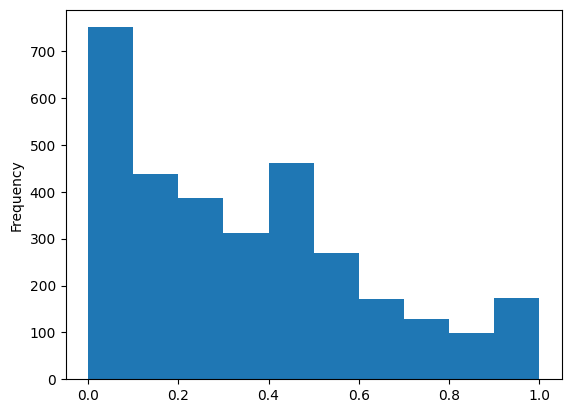

In [72]:
district.area.plot(kind='hist')

In [73]:
# 각 sid별 최다 지역
major_dcode = district.sort_values('area', ascending=False).groupby('sid').dname.first()
major_dcode.head(3)

sid
강원_강릉_강남동주민센터       녹지지역
강원_강릉_강릉농협 하나로마트    주거지역
강원_강릉_강릉축협 하나로마트    주거지역
Name: dname, dtype: object

In [74]:
# 각 sid별 용도지역 차지비율
district_ratio = district.pivot(index='sid', columns='dname', values='area').reset_index().fillna(0) \
                         .rename(columns={'공업지역':'indust_ratio', '기타':'etc_ratio', '녹지지역':'green_ratio', '상업지역':'commerce_ratio', '주거지역':'reside_ratio'})
district_ratio.head(3)

dname,sid,indust_ratio,etc_ratio,green_ratio,commerce_ratio,reside_ratio
0,강원_강릉_강남동주민센터,0.00,0.00,0.54,0.00,0.46
1,강원_강릉_강릉농협 하나로마트,0.00,0.00,0.26,0.33,0.41
2,강원_강릉_강릉축협 하나로마트,0.00,0.00,0.42,0.00,0.58


In [75]:
pub_station = pub_station.merge(district_ratio, how='left', on='sid').merge(major_dcode, how='left', on='sid')
pub_station.head(3)

,station_name,sid,address,lat,long,district_lv2,district_lv3,fast_cnt,slow_cnt,mean_speed,...,length_highway,length_national,length_local,length_city,indust_ratio,etc_ratio,green_ratio,commerce_ratio,reside_ratio,dname
0,화양강휴게소,강원_홍천_화양강휴게소,강원도 홍천군 두촌면 철정리 978-6,37.80,127.99,강원도_홍천군,강원도_홍천군_두촌면,1,0,50.00,...,0.00,2065.53,0.00,2590.38,NaN,NaN,NaN,NaN,NaN,NaN
1,상암월드컵경기장,서울_마포용산_상암월드컵경기장,서울특별시 마포구 성산동 531,37.57,126.89,서울특별시_마포구,서울특별시_마포구_성산동,7,3,50.00,...,499.55,4236.51,0.00,2929.40,0.00,0.00,0.68,0.00,0.32,녹지지역
2,대정읍사무소,제주_서귀포_대정읍사무소,제주특별자치도 서귀포시 대정읍 하모리 1413,33.23,126.25,제주특별자치도_서귀포시,제주특별자치도_서귀포시_대정읍,4,0,50.00,...,0.00,0.00,1816.24,7394.46,0.00,0.00,0.30,0.12,0.58,주거지역


In [76]:
pub_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     1304 non-null   object 
 1   sid              1304 non-null   object 
 2   address          1304 non-null   object 
 3   lat              1304 non-null   float64
 4   long             1304 non-null   float64
 5   district_lv2     1304 non-null   object 
 6   district_lv3     1304 non-null   object 
 7   fast_cnt         1304 non-null   int64  
 8   slow_cnt         1304 non-null   int64  
 9   mean_speed       1293 non-null   float64
 10  mean_trip        1216 non-null   float64
 11  length_highway   1304 non-null   float64
 12  length_national  1304 non-null   float64
 13  length_local     1304 non-null   float64
 14  length_city      1304 non-null   float64
 15  indust_ratio     1122 non-null   float64
 16  etc_ratio        1122 non-null   float64
 17  green_ratio   

## 모델링 sid로 제한

In [77]:
sequences = pd.read_csv('../data/input_table/fast_history_by_station_size20.csv', parse_dates=['time'])

In [78]:
sequences.set_index('time').columns

Index(['강원_강릉_HAPPY700 평창시네마', '강원_강릉_강남동주민센터', '강원_강릉_강릉축협 하나로마트',
       '강원_강릉_강원도교육연수원', '강원_강릉_강원양돈농협 하나로마트', '강원_강릉_경포해수욕장', '강원_강릉_교2동주민센터',
       '강원_강릉_녹색도시체험센터', '강원_강릉_대관령면 관광안내소', '강원_강릉_보헤미안박이추 커피공장',
       ...
       '충북_충주_금릉주차장', '충북_충주_노은면 행정복지센터', '충북_충주_대소원면 주민자치센터',
       '충북_충주_성서동 공영주차장', '충북_충주_이마트 충주점', '충북_충주_중앙탑면 행정복지센터',
       '충북_충주_충주시청 민원주차장', '충북_충주_충주실내체육관', '충북_충주_충주종합스포츠타운', '충북_충주_평생학습관'],
      dtype='object', length=828)

In [79]:
pub_station = pub_station[pub_station.sid.isin(sequences.columns)].dropna()

In [80]:
pub_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 1 to 1135
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_name     690 non-null    object 
 1   sid              690 non-null    object 
 2   address          690 non-null    object 
 3   lat              690 non-null    float64
 4   long             690 non-null    float64
 5   district_lv2     690 non-null    object 
 6   district_lv3     690 non-null    object 
 7   fast_cnt         690 non-null    int64  
 8   slow_cnt         690 non-null    int64  
 9   mean_speed       690 non-null    float64
 10  mean_trip        690 non-null    float64
 11  length_highway   690 non-null    float64
 12  length_national  690 non-null    float64
 13  length_local     690 non-null    float64
 14  length_city      690 non-null    float64
 15  indust_ratio     690 non-null    float64
 16  etc_ratio        690 non-null    float64
 17  green_ratio    

In [81]:
seq = sequences.set_index('time').T.reset_index().rename(columns={'index':'sid'})
seq = seq[seq.sid.isin(pub_station.sid)].set_index('sid')  # 690개 스테이션 제한

<AxesSubplot: ylabel='Frequency'>

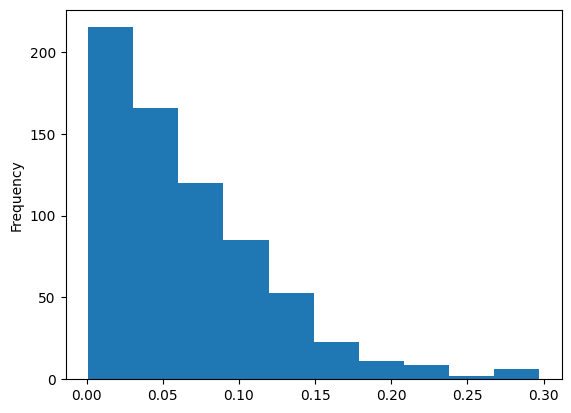

In [82]:
seq.mean(axis=1).plot(kind='hist')

In [83]:
seq.mean(axis=1).ge(0.1).sum()

158

In [84]:
# 그루핑 
# <0.05 modeling group 0 (neq)
# >= 0.05 modeling group (pos)

group_encoder = {station_id:1 for station_id in seq[seq.mean(axis=1).ge(0.1)].index}
for station_id in seq[seq.mean(axis=1).lt(0.1)].index:
    group_encoder[station_id] = 0

In [85]:
pub_station['modeling_group'] = pub_station.sid.map(group_encoder)

In [86]:
train_station = pub_station.groupby('modeling_group', group_keys=False).apply(lambda df: df.sample(frac=0.8, random_state=42)).copy()
test_station = pub_station[~pub_station.sid.isin(train_station.sid)].copy()

## Dimensionality Reduction

In [87]:
pub_station.columns

Index(['station_name', 'sid', 'address', 'lat', 'long', 'district_lv2',
       'district_lv3', 'fast_cnt', 'slow_cnt', 'mean_speed', 'mean_trip',
       'length_highway', 'length_national', 'length_local', 'length_city',
       'indust_ratio', 'etc_ratio', 'green_ratio', 'commerce_ratio',
       'reside_ratio', 'dname', 'modeling_group'],
      dtype='object')

In [88]:
# 총 690개의 station
n_station = pub_station.shape[0]
print('number of stations: ', n_station)

number of stations:  690


### Train-Test Split

In [89]:
# # 단순 무작위 분할

# pub_station = pub_station.sample(frac=1, random_state=42)  # shuffling

In [90]:
# TEST_FRAC = 0.1
# n_train = round(n_station * (1-TEST_FRAC))

# print('number of train: ', n_train)
# train_station = pub_station.iloc[:n_train].copy()
# test_station = pub_station.iloc[n_train:].copy()

### sid label encoding

<AxesSubplot: ylabel='Frequency'>

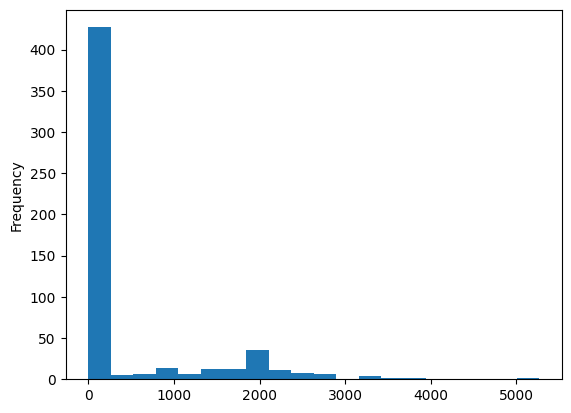

In [91]:
train_station.length_local.plot(kind='hist', bins=20)

In [92]:
train_station.length_local.describe()

count     552.00
mean      412.06
std       849.08
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      5264.19
Name: length_local, dtype: float64

In [94]:
station_features = ['lat', 'long', 'fast_cnt', 'slow_cnt', 'mean_trip', 'mean_speed',
                    'length_highway', 'length_national', 'length_local', 'length_city', 
                    'indust_ratio', 'etc_ratio', 'green_ratio', 'commerce_ratio', 'reside_ratio']

In [95]:
X_train = train_station[station_features].values
X_test = test_station[station_features].values

In [96]:
X_train.shape, X_test.shape

((552, 15), (138, 15))

In [97]:
X_train

array([[3.65115730e+01, 1.27247795e+02, 2.00000000e+00, ...,
        2.32456826e-01, 7.62095498e-02, 6.91333624e-01],
       [3.50258931e+01, 1.26785551e+02, 1.00000000e+00, ...,
        1.08171782e-01, 6.05549373e-02, 3.31273299e-01],
       [3.74910844e+01, 1.26903354e+02, 1.00000000e+00, ...,
        0.00000000e+00, 7.00073864e-03, 4.92999166e-01],
       ...,
       [3.78477219e+01, 1.27160350e+02, 1.00000000e+00, ...,
        3.44890329e-02, 0.00000000e+00, 9.65510967e-01],
       [3.58603590e+01, 1.28563053e+02, 1.00000000e+00, ...,
        8.05265063e-03, 9.27951488e-02, 3.99152040e-01],
       [3.74935644e+01, 1.27146970e+02, 1.00000000e+00, ...,
        2.30473330e-02, 0.00000000e+00, 4.76953246e-01]])

### Scaling

In [98]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

scaler = MinMaxScaler((-1,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### checkpoint: feature set before dim. reduction

In [99]:
# pub_station_scaled = pd.DataFrame(data=X_train, columns=station_features)
# pub_station_scaled['sid'] = pub_station.sid.values
# pub_station_scaled.head()

In [100]:
import umap

trans = umap.UMAP(n_neighbors=20, n_components=2, metric='cosine', random_state=42).fit(X_train)
test_embedding = trans.transform(X_test)

/tmp/ipykernel_25847/2154582215.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, cmap='Spectral')


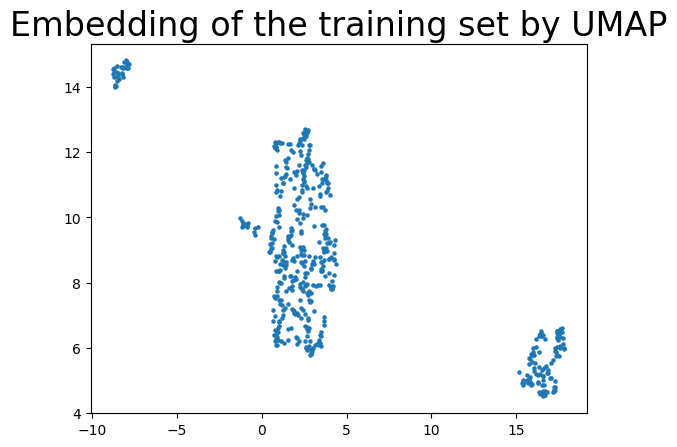

In [101]:
import matplotlib.pyplot as plt

plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

/tmp/ipykernel_25847/3333902868.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, cmap='Spectral')


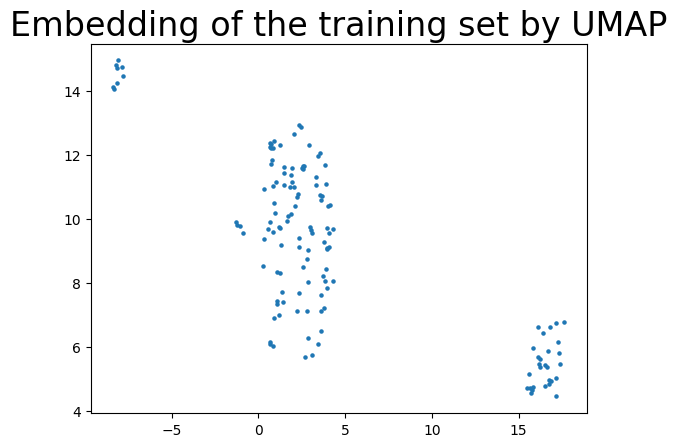

In [102]:
import matplotlib.pyplot as plt

plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [103]:
trans = umap.UMAP(n_neighbors=20, n_components=8, metric='cosine', random_state=42).fit(X_train)
test_embedding = trans.transform(X_test)

In [104]:
pub_station_embedding = pd.concat([pd.DataFrame(data=trans.embedding_, index=train_station.sid, columns=[ 'dim_' + str(i) for i in range(8)]).reset_index(),
                                   pd.DataFrame(data=test_embedding, index=test_station.sid, columns=[ 'dim_' + str(i) for i in range(8)]).reset_index()])

In [105]:
pub_station_attributes = pd.concat([pd.DataFrame(data=X_train, index=train_station.sid, columns=station_features).reset_index(),
                                    pd.DataFrame(data=X_test, index=test_station.sid, columns=station_features).reset_index()])
pub_station_attributes

,sid,lat,long,fast_cnt,slow_cnt,mean_trip,mean_speed,length_highway,length_national,length_local,length_city,indust_ratio,etc_ratio,green_ratio,commerce_ratio,reside_ratio
0,대전세종충남_세종_아름공영주차장,0.33,-0.58,-0.71,-1.00,-0.97,-1.00,-1.00,-1.00,-1.00,-0.24,-1.00,-1.00,-0.54,-0.85,0.38
1,본사_본사_한전본사 파빌리온주차장(공용),-0.27,-0.78,-1.00,-0.50,-0.93,-1.00,-1.00,-1.00,-1.00,-0.43,-1.00,-0.00,-0.78,-0.88,-0.34
2,남서울_남서울직할_대림어린이공원 공영주차장,0.72,-0.73,-1.00,-1.00,-0.71,-1.00,-1.00,-1.00,-1.00,-0.55,-1.00,0.00,-1.00,-0.99,-0.01
3,광주전남_진도_진도문화회관,-0.49,-1.00,-1.00,-1.00,-0.99,-1.00,-1.00,-0.18,-1.00,-0.46,-1.00,-1.00,0.14,-0.95,-0.19
4,경북_경북직할_육아종합지원센터,0.35,0.05,-1.00,-1.00,-0.84,-1.00,-1.00,-0.21,-1.00,-0.45,-1.00,-1.00,-0.62,-0.99,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,제주_서귀포_표선공영주차장,-0.95,-0.76,-0.43,-1.00,-0.99,0.33,-1.00,-1.00,-0.26,-0.29,-1.00,-0.99,-0.56,-0.71,0.26
134,전북_고창_고창 한국농어촌공사 충전소,-0.11,-0.82,-0.71,-1.00,-0.96,-1.00,-1.00,-0.25,-1.00,-0.58,-1.00,-0.00,-0.22,-1.00,-0.78
135,부산울산_서울산_삼동면 복지센터,-0.07,0.24,-1.00,-1.00,-0.98,-1.00,-1.00,-1.00,-0.20,-0.84,-1.00,-1.00,0.63,-1.00,-0.63
136,경기_안양_포일어울림센터,0.68,-0.69,-0.71,-1.00,-0.75,1.00,-1.00,-0.84,-0.24,-0.26,-1.00,-1.00,-0.08,-0.97,0.05


### Iterate


In [107]:
import os
import numpy as np
from tqdm import tqdm


ROOT_DIR = '../data/input_table/by_test_frac'

for test_frac in tqdm(np.arange(0.1, 1, 0.1)):
    save_dir = os.path.join(ROOT_DIR, str(round(test_frac,1)))
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # n_train = round(n_station * (1-test_frac))
    # print('number of train: ', n_train)
    # train_station = pub_station.iloc[:n_train].copy()
    # test_station = pub_station.iloc[n_train:].copy()

    test_station = pub_station.groupby('modeling_group', group_keys=False).apply(lambda df: df.sample(frac=test_frac, random_state=42)).copy()
    train_station = pub_station[~pub_station.sid.isin(test_station.sid)].copy()
    print('number of train: ', train_station.shape[0], 'number of test: ', test_station.shape[0])

    station_features = ['lat', 'long', 'fast_cnt', 'slow_cnt', 'mean_trip', 'mean_speed',
                        'length_highway', 'length_national', 'length_local', 'length_city', 
                        'indust_ratio', 'etc_ratio', 'green_ratio', 'commerce_ratio', 'reside_ratio']

    X_train = train_station[station_features].values
    X_test = test_station[station_features].values


    from sklearn.preprocessing import RobustScaler

    scaler = RobustScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    trans = umap.UMAP(n_neighbors=20, n_components=8, metric='cosine', random_state=42).fit(X_train)
    test_embedding = trans.transform(X_test)

    pub_station_embedding = pd.concat([pd.DataFrame(data=trans.embedding_, index=train_station.sid, columns=[ 'dim_' + str(i) for i in range(8)]).reset_index(),
                                    pd.DataFrame(data=test_embedding, index=test_station.sid, columns=[ 'dim_' + str(i) for i in range(8)]).reset_index()])

    pub_station_attributes = pd.concat([pd.DataFrame(data=X_train, index=train_station.sid, columns=station_features).reset_index(),
                                        pd.DataFrame(data=X_test, index=test_station.sid, columns=station_features).reset_index()])

    pub_station_embedding.to_csv(os.path.join(save_dir, 'station_embedding.csv'), index=False)
    pub_station_attributes.to_csv(os.path.join(save_dir,'station_attributes.csv'), index=False)

    # mopdel input selection - save sequences
    seq_labeled = pd.read_csv('../data/input_table/fast_history_by_station_size20_bin3.csv', parse_dates=['time']) \
        .set_index('time').T.reset_index().rename(columns={'index':'sid'})
    seq_labeled = seq_labeled[seq_labeled.sid.isin(pub_station.sid)].set_index('sid')

    modeling_seq = seq_labeled[seq.mean(axis=1).ge(0.1)].copy()
    modeling_seq[modeling_seq.index.isin(train_station.sid)].T.reset_index().to_csv(os.path.join(save_dir, 'train_sequences_multicls_size20_bin3_dim8.csv'), index=False)
    modeling_seq[modeling_seq.index.isin(test_station.sid)].T.reset_index().to_csv(os.path.join(save_dir, 'test_sequences_multicls_size20_bin3_dim8.csv'), index=False)

  0%|          | 0/9 [00:00<?, ?it/s]

number of train:  621 number of test:  69


 11%|█         | 1/9 [00:05<00:45,  5.73s/it]

number of train:  552 number of test:  138


 22%|██▏       | 2/9 [00:12<00:42,  6.14s/it]

number of train:  483 number of test:  207


 33%|███▎      | 3/9 [00:17<00:34,  5.78s/it]

number of train:  414 number of test:  276


 44%|████▍     | 4/9 [00:24<00:30,  6.07s/it]

number of train:  345 number of test:  345


 56%|█████▌    | 5/9 [00:29<00:23,  5.93s/it]

number of train:  276 number of test:  414


 67%|██████▋   | 6/9 [00:34<00:17,  5.70s/it]

number of train:  207 number of test:  483


 78%|███████▊  | 7/9 [00:40<00:11,  5.53s/it]

number of train:  138 number of test:  552


 89%|████████▉ | 8/9 [00:44<00:05,  5.20s/it]

number of train:  69 number of test:  621


100%|██████████| 9/9 [00:49<00:00,  5.53s/it]


## 저장 결과 확인

In [1]:
import os.path as osp
import pandas as pd

TEST_FRAC = 0.5
ROOT_DIR = '../data/input_table/by_test_frac'

train_seq = pd.read_csv(osp.join(ROOT_DIR, str(TEST_FRAC), 'train_sequences_cls.csv'))
test_seq = pd.read_csv(osp.join(ROOT_DIR, str(TEST_FRAC), 'test_sequences_cls.csv'))

station_attributes = pd.read_csv(osp.join(ROOT_DIR, str(TEST_FRAC), 'station_attributes.csv'))
station_embeddings = pd.read_csv(osp.join(ROOT_DIR, str(TEST_FRAC), 'station_embedding.csv'))

In [2]:
train_seq.shape

(13248, 64)

In [5]:
test_seq.mean().mean()

/tmp/ipykernel_38451/978582919.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_seq.mean().mean()


0.8564226371357332

In [13]:
train_seq.set_index('time').mask(lambda x: x < 0.5,  1).mask(lambda x: x != 1, 0)

,강원_강릉_강남동주민센터,강원_강릉_성덕동주민센터,강원_강릉_주문진해수욕장,강원_강릉_홍제동 공영주차장,강원_강원직할_김유정문학마을,강원_강원직할_동내면사무소,강원_강원직할_홈플러스 춘천점,강원_동해_동해지사(공용),강원_동해_이마트 동해점,강원_삼척_홈플러스 삼척점,...,제주_제주직할_한림체육관,제주_제주직할_화북2동 공영주차장,충북_보은_보은군보건소,충북_음성_음성체육관,충북_제천_이마트 제천점,충북_증평괴산_증평문화회관,충북_진천_대소면 행정복지센터,충북_진천_음성군 근로자종합복지관,충북_충주_금릉주차장,충북_충주_성서동 공영주차장
time,,,,,,,,,,,,,,,,,,,,,
2021-07-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-07-01 00:20:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-07-01 00:40:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2021-07-01 01:00:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-07-01 01:20:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 22:20:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-30 22:40:00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-09-30 23:00:00,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
sid_encoder = {name:idx for idx, name in enumerate(station_embeddings.sid.values)}

In [34]:
station_embeddings.sid

0           대구_동대구_수성구민운동장
1        제주_제주직할_제주 삼양 유적지
2           경기_성남_성남지사(공용)
3           경남_진주_홈플러스 진주점
4      남서울_강동송파_천호1동 공영주차장
              ...         
685         부산울산_김해_문화의 전당
686       제주_서귀포_수산1리 복지회관
687           대구_경주_불국사주차장
688       전북_전북직할_전북직할(공용)
689        대구_경주_경주화백컨벤션센터
Name: sid, Length: 690, dtype: object